# Safeframe AI Evaluation

Contains sample user queries and code generated from Safeframe AI for UCI Household Energy dataset.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
filepath = r"/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt"

In [8]:
df = pd.read_csv(
    filepath,
    sep=';',
    parse_dates={'datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    na_values=['?'],
    low_memory=False
)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

/tmp/ipykernel_35/3408045592.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipykernel_35/3408045592.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipykernel_35/3408045592.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


In [9]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**User Query 1: What was the average active power consumption in March 2007?**

In [6]:
df.loc['2007-03', 'Global_active_power'].mean()

1.318627030175407

**User Query 2: What hour of the day had the highest power usage on Christmas 2006?**

In [7]:
df.loc['2006-12-25'].groupby(df.loc['2006-12-25'].index.hour)['Global_active_power'].sum().idxmax()

22

**User Query 3: Compare energy usage (Global_active_power) on weekdays vs weekends.**

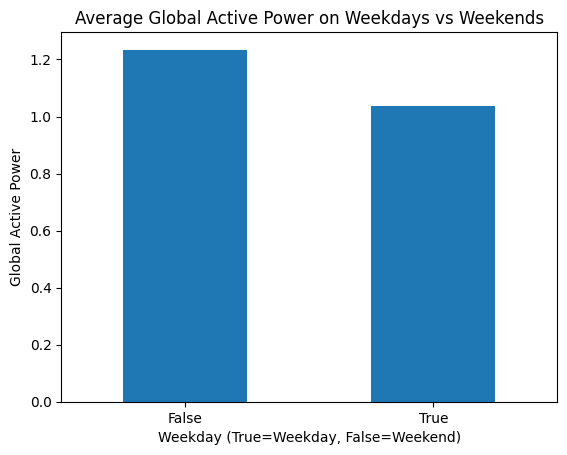

In [10]:
df.groupby(df.index.dayofweek < 5)['Global_active_power'].mean().plot(kind='bar') # plot average active power by weekday
plt.title('Average Global Active Power on Weekdays vs Weekends') # add title
plt.xlabel('Weekday (True=Weekday, False=Weekend)') # add x label
plt.ylabel('Global Active Power') # add y label
plt.xticks(rotation=0) # rotate x ticks
plt.show() # show plot

**User Query 4: Find days where energy consumption exceeded 5 kWh.**

In [9]:
(df['Global_active_power'].resample('D').sum() > 5).index[df['Global_active_power'].resample('D').sum() > 5].date

array([datetime.date(2006, 12, 16), datetime.date(2006, 12, 17),
       datetime.date(2006, 12, 18), ..., datetime.date(2010, 11, 24),
       datetime.date(2010, 11, 25), datetime.date(2010, 11, 26)],
      dtype=object)

**User Query 5: Plot the energy usage trend for the first week of January 2007.**

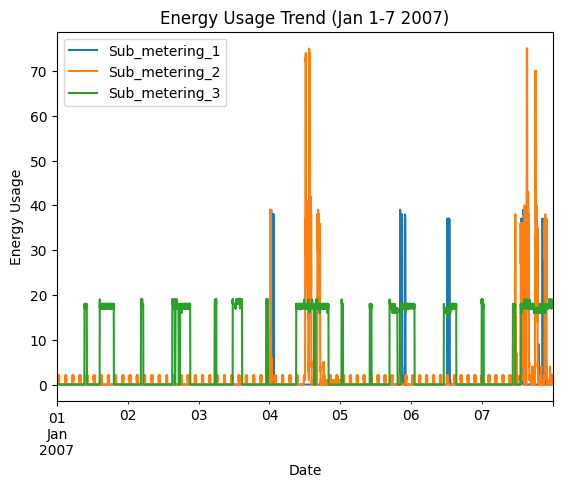

In [11]:
df.loc['2007-01-01':'2007-01-07', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].plot()
plt.title('Energy Usage Trend (Jan 1-7 2007)')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.legend(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
plt.show()

**User Query 6: Find the average voltage for each day of the first week of February 2007.**

In [11]:
df.loc['2007-02-01':'2007-02-07', 'Voltage'].resample('D').mean()

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64

**User Query 7: What is the correlation between global active power and sub-metering values?**

In [12]:
df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.484401,0.434569,0.638555
Sub_metering_1,0.484401,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.102571,0.080872,1.000000


**User Query 8: What is the average Global_active_power for each month in 2007?**

In [13]:
df.loc['2007'].groupby(df.loc['2007'].index.month)['Global_active_power'].mean()

datetime
1     1.546034
2     1.401084
3     1.318627
4     0.891189
5     0.985862
6     0.826814
7     0.667367
8     0.764186
9     0.969318
10    1.103911
11    1.294473
12    1.626474
Name: Global_active_power, dtype: float64

**User Query 9: Plot a daily line chart of Sub-meter 1 energy usage for the first two weeks of February 2008.**

Text(0, 0.5, 'Sub-meter 1 Usage')

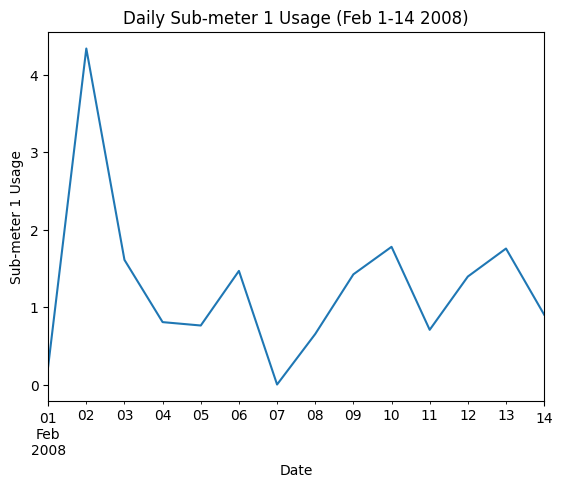

In [12]:
df.loc['2008-02-01':'2008-02-14', 'Sub_metering_1'].resample('D').mean().plot()
plt.title('Daily Sub-meter 1 Usage (Feb 1-14 2008)')
plt.xlabel('Date')
plt.ylabel('Sub-meter 1 Usage')

**User Query 10: Which hour of the day has the highest mean Global_reactive_power across the whole dataset?**

In [15]:
df.groupby(df.index.hour)['Global_reactive_power'].mean().idxmax()

19

**User Query 11: Create a Seaborn heat-map of average Voltage by weekday vs. hour.**

Text(50.722222222222214, 0.5, 'Weekday')

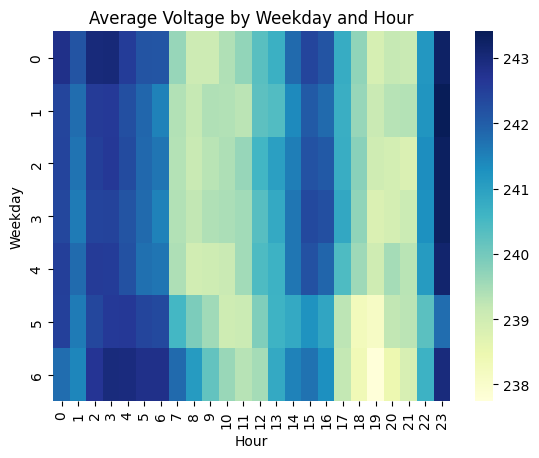

In [18]:
 import seaborn as sns
sns.heatmap(df.groupby([df.index.weekday, df.index.hour])['Voltage'].mean().unstack(), cmap='YlGnBu') # heatmap of avg voltage by weekday/hour
plt.title('Average Voltage by Weekday and Hour') # add title
plt.xlabel('Hour') # add x-axis label
plt.ylabel('Weekday') # add y-axis label

**User Query 12: Show a bar plot comparing the yearly mean of Global_intensity for 2006, 2007, and 2008.**

Text(0, 0.5, 'Mean Global Intensity')

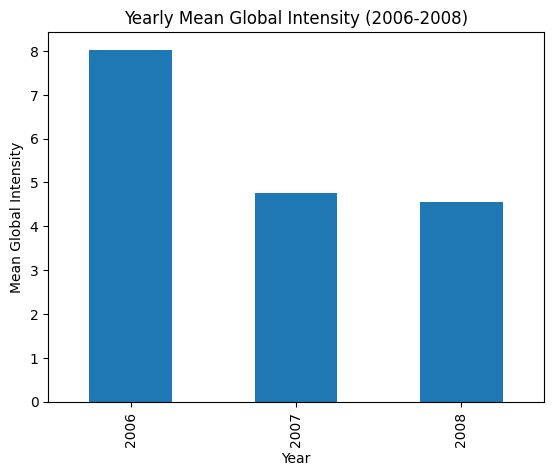

In [30]:
df.loc['2006':'2008'].groupby(df.loc['2006':'2008'].index.year)['Global_intensity'].mean().plot(kind='bar')
plt.title('Yearly Mean Global Intensity (2006-2008)')
plt.xlabel('Year')
plt.ylabel('Mean Global Intensity')

**User Query 13: Compute the Pearson correlation matrix for Global_active_power, Global_reactive_power, Voltage, and Global_intensity, and plot it as a Seaborn heat-map**

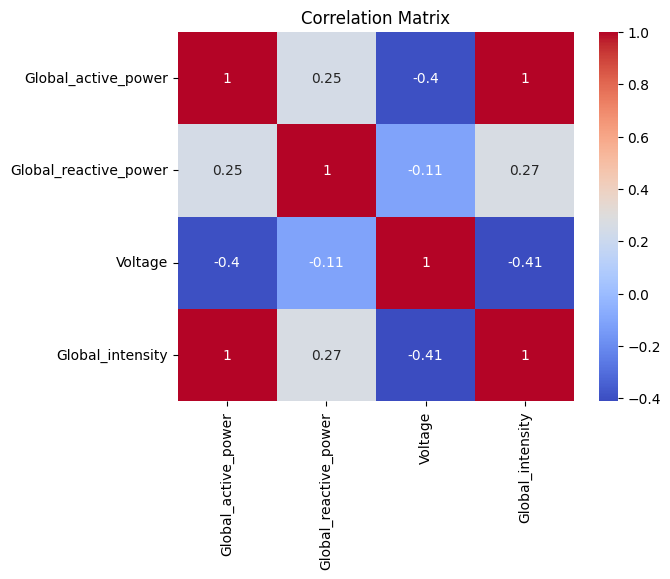

In [32]:
 import seaborn as sns
sns.heatmap(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**User Query 14: For March 2007, plot a rolling 24-hour mean of Global_active_power.**

/tmp/ipykernel_35/4247579591.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.loc['2007-03', 'Global_active_power'].rolling('24H').mean().plot()


Text(0.5, 1.0, '24-h Rolling Mean of Active Power (Mar 2007)')

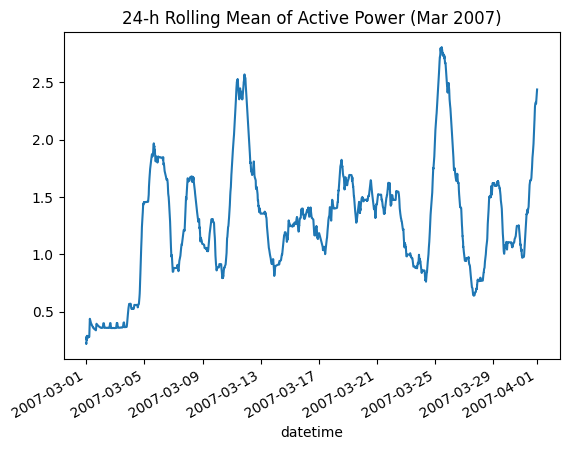

In [33]:
df.loc['2007-03', 'Global_active_power'].rolling('24H').mean().plot()
plt.title('24-h Rolling Mean of Active Power (Mar 2007)')

**User Query 15: Make a Seaborn pair-plot of the three sub-meter columns to visualise their relationships.**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


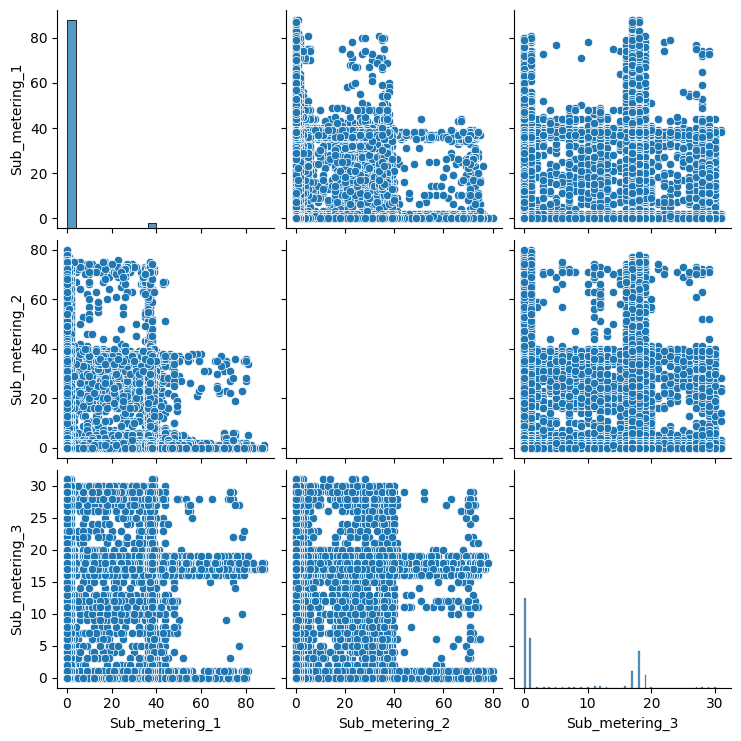

In [38]:
 import seaborn as sns
sns.pairplot(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]) # pairplot of sub-meter columns
plt.show() # show the plot